In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data_path = 's&p.csv'

data = pd.read_csv(data_path, delimiter=',')

data['Dernier'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)


data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.sort_values('Date', inplace=True)

data['Rendement Log'] = np.log(data['Dernier'] / data['Dernier'].shift(1))

data.set_index('Date', inplace=True)

squared_log_returns = data['Rendement Log']**2

/var/folders/9y/y5_s_cyx4psbjyhpxy6tbh9w0000gn/T/ipykernel_20962/2921037863.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dernier'] = data['Dernier'].str.replace('.', '').str.replace(',', '.').astype(float)


In [14]:
def run(h):
    vol_prox = squared_log_returns.rolling(window=h).mean() * np.sqrt(252)

    log_vol = np.log(vol_prox)
    plt.figure(figsize=(10, 6))
    plt.xlabel('t')
    plt.ylabel('sigma_{h,t}')
    plt.plot(vol_prox)
    plt.show()
    echelles_temps = range(2, 50)
    q_values = list(np.linspace(0.5,3,6))  # Différentes valeurs de q

    m_values = {q: [] for q in q_values}
    delta_values = []

    for delta in echelles_temps:
        for q in q_values:
            # Calcul de m(q, Delta) pour chaque q et Delta
            mq_delta = np.mean(np.abs(log_vol.diff(periods=delta))**q)
            m_values[q].append(mq_delta)
    
        delta_values.append(delta)
    plt.figure(figsize=(10, 6))
    for q in q_values:
        plt.scatter(np.log(delta_values), np.log(m_values[q]), label=f'q={q}', marker='x')

    plt.xlabel('log(Δ)')
    plt.ylabel('log(m(q, Δ))')
    plt.legend()
    plt.show()
    log_delta = np.log(delta_values)
    log_m_values = {q: np.log(m) for q, m in m_values.items()}

    # Étape 1: Régression de log(m) contre log(delta) pour chaque q
    slopes = []
    for q in q_values:
        X = sm.add_constant(log_delta)  # Ajouter une constante pour le terme d'interception
        model = sm.OLS(log_m_values[q], X).fit()
        slopes.append(model.params[1])  # Récupérer le coefficient de pente
    
    plt.figure(figsize=(6, 6))
    plt.xlabel('q')
    plt.ylabel('zeta(q)')
    plt.plot(q_values, slopes)
    plt.show()
    # Étape 2: Régression des coefficients (slopes) contre q
    X = sm.add_constant(q_values)  # Ajouter une constante pour le terme d'interception
    model_h = sm.OLS(slopes, X).fit()
    H = model_h.params[1]  # Le coefficient associé à q est notre estimation de H

    print(f"Estimation du coefficient de Hurst, H: {H}")

    print(model_h.summary())
        

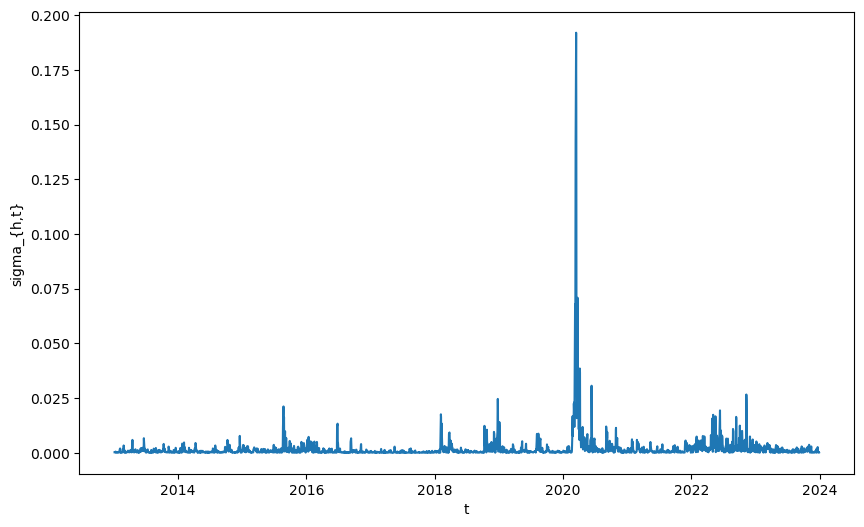

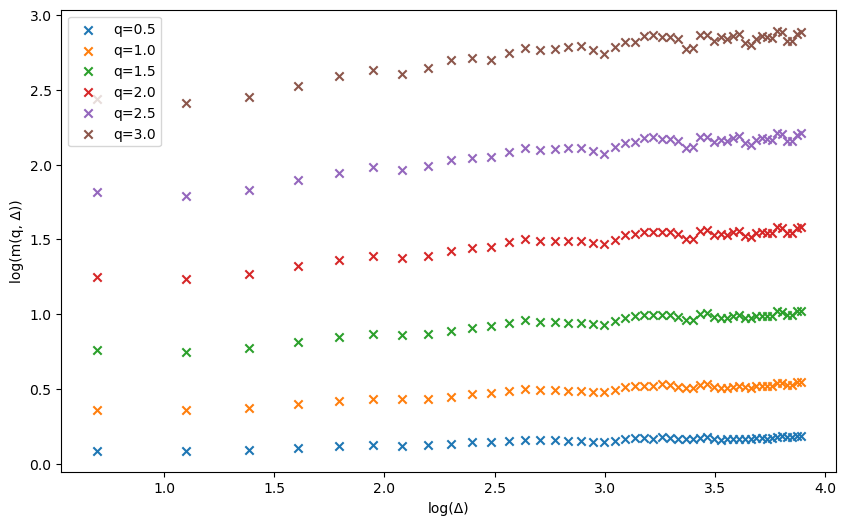

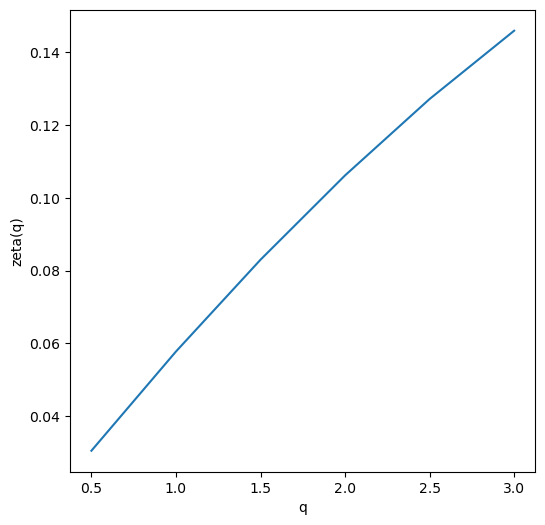

Estimation du coefficient de Hurst, H: 0.046192242472968804
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     888.7
Date:                Sat, 04 May 2024   Prob (F-statistic):           7.54e-06
Time:                        16:23:16   Log-Likelihood:                 27.094
No. Observations:                   6   AIC:                            -50.19
Df Residuals:                       4   BIC:                            -50.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [16]:
run(2)

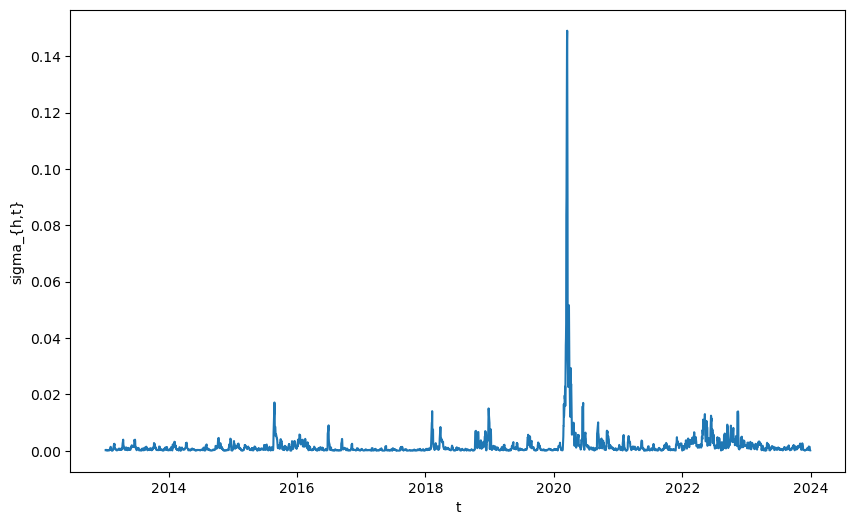

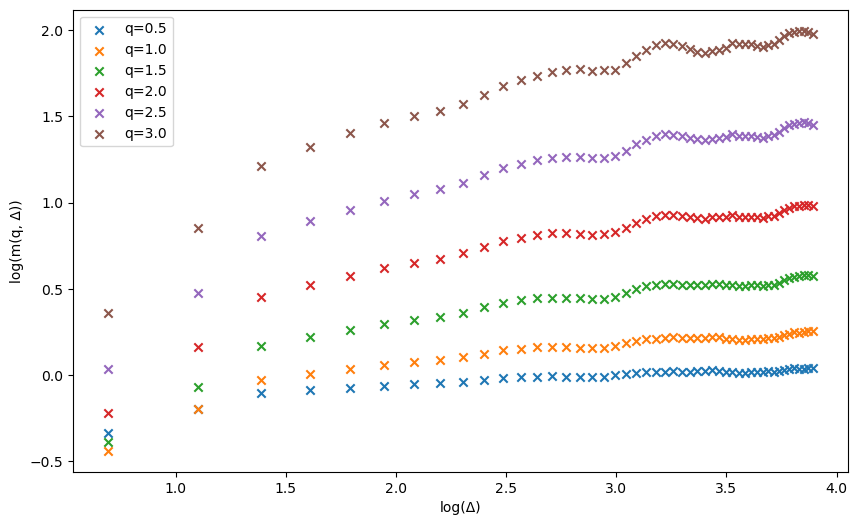

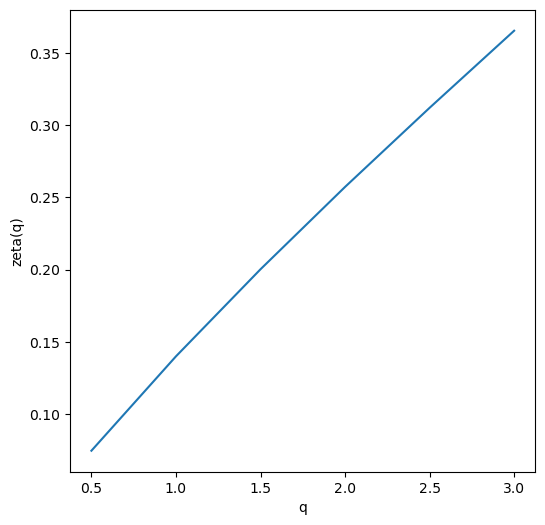

Estimation du coefficient de Hurst, H: 0.11588385817217538
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2847.
Date:                Sat, 04 May 2024   Prob (F-statistic):           7.38e-07
Time:                        16:24:03   Log-Likelihood:                 25.068
No. Observations:                   6   AIC:                            -46.14
Df Residuals:                       4   BIC:                            -46.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
run(4)

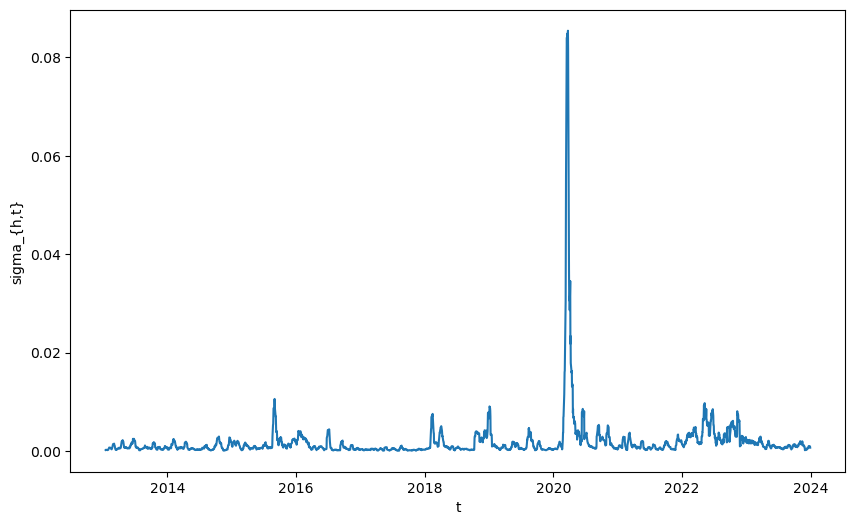

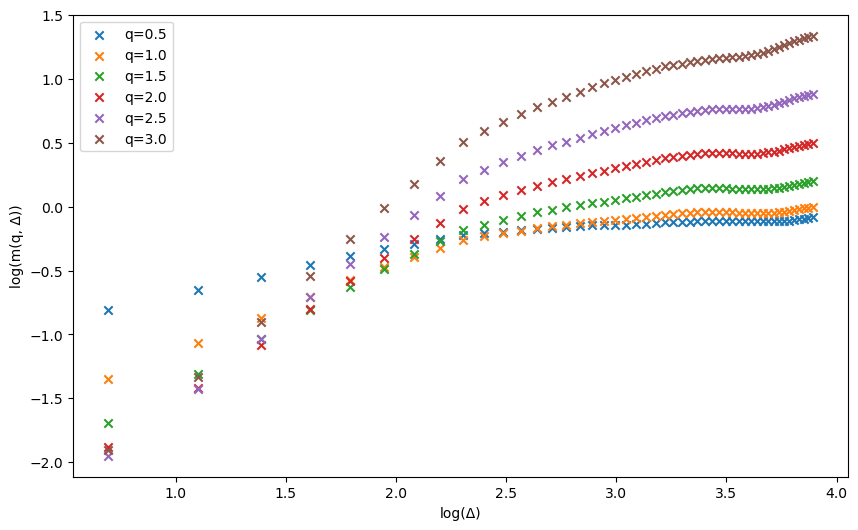

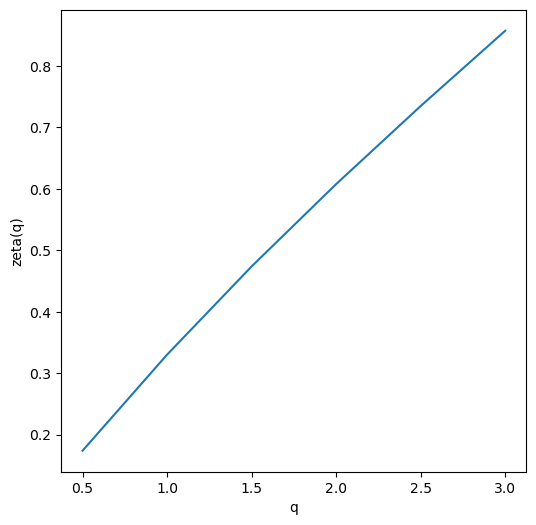

Estimation du coefficient de Hurst, H: 0.272119944574194
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1931.
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.60e-06
Time:                        16:24:10   Log-Likelihood:                 18.781
No. Observations:                   6   AIC:                            -33.56
Df Residuals:                       4   BIC:                            -33.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [18]:
run(10)

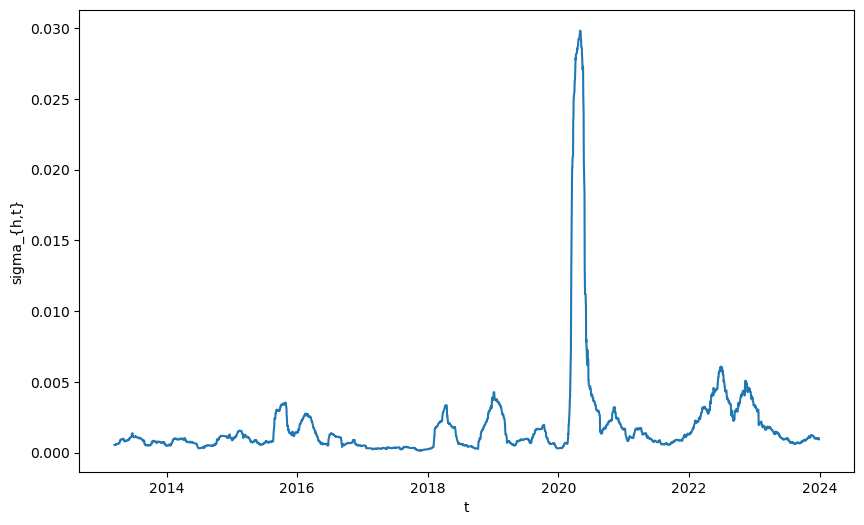

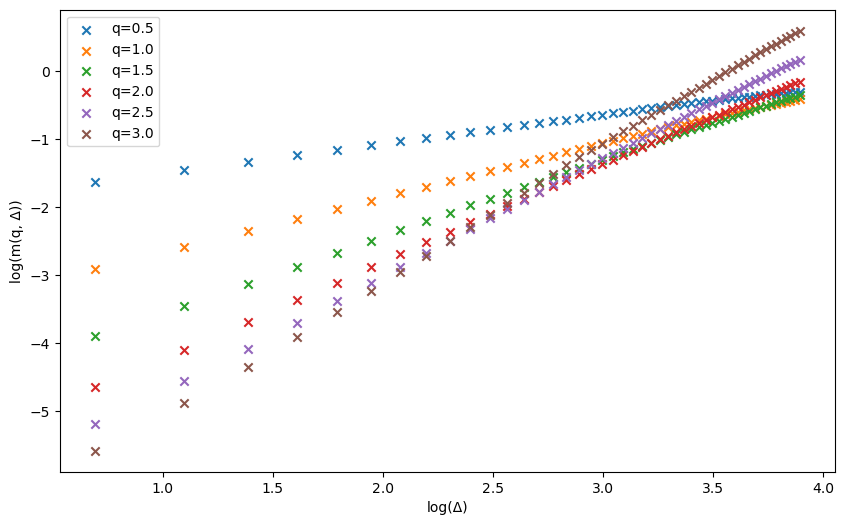

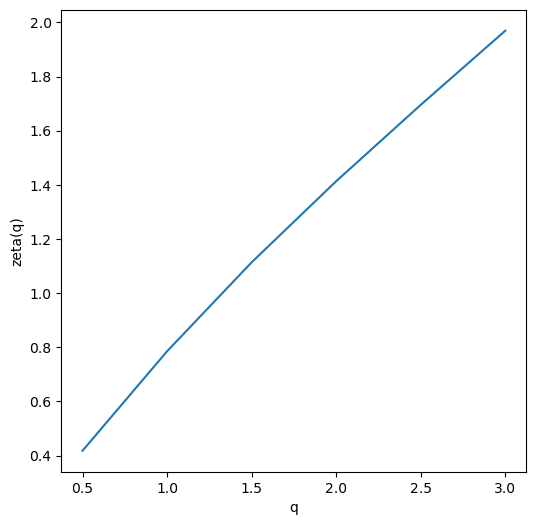

Estimation du coefficient de Hurst, H: 0.616541706008483
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1261.
Date:                Sat, 04 May 2024   Prob (F-statistic):           3.75e-06
Time:                        16:24:17   Log-Likelihood:                 12.597
No. Observations:                   6   AIC:                            -21.19
Df Residuals:                       4   BIC:                            -21.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [19]:
run(50)

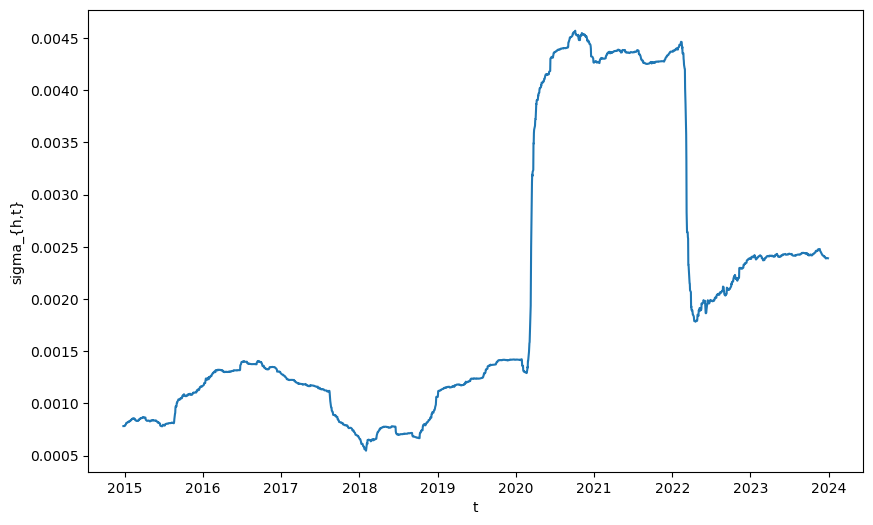

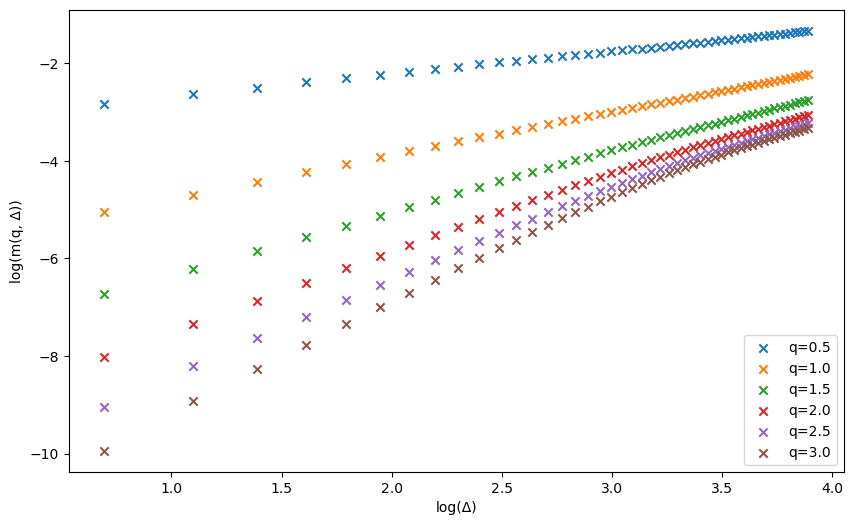

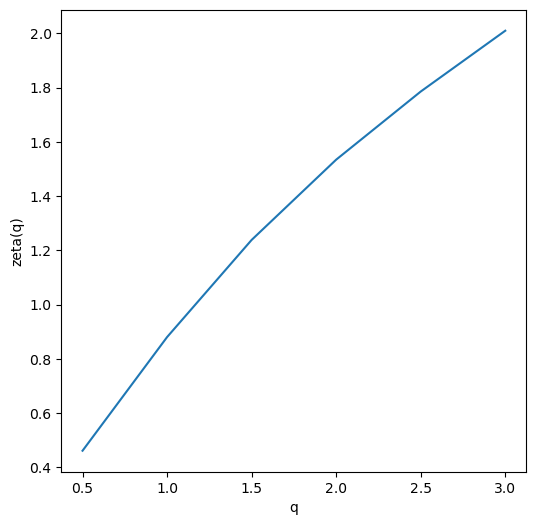

Estimation du coefficient de Hurst, H: 0.6149516950206725
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     279.0
Date:                Sat, 04 May 2024   Prob (F-statistic):           7.53e-05
Time:                        16:27:21   Log-Likelihood:                 8.0855
No. Observations:                   6   AIC:                            -12.17
Df Residuals:                       4   BIC:                            -12.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/axelpincon/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [25]:
run(500)